<a href="https://colab.research.google.com/github/Naveenklaxman22/Techno-Trench-DS/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#IRIS FLOWER CLASSIFICATION
'''
  The objective is to develop a machine learning model capable of accurately classifying iris flowers based on its features.
  This involves training a supervised learning algorithm to recognize patterns within the dataset.
Input:
  Sepal length
  Petal length
  Sepal width
  Petal width
Output:
  Class of flower (1.Setosa, 2.Versicolor, 3.Virginica)

Steps Involved:
  Data Preparation:
    Load and inspect the dataset to understand its structure and ensure data integrity.
  Data Splitting:
    Divide the dataset into features (X) and target labels (y) using train_test_split to create training and testing sets.
  Model Selection:
    Choose a classification algorithm suitable for the Iris dataset, such as Decision Trees, Support Vector Machines (SVM) or K-Nearest Neighbors (KNN).
  Model Training:
    Train the selected model using the training data to learn patterns and relationships.
  Prediction:
  Use the trained model to make predictions on the test dataset.
  Model Evaluation: Assess the model's performance using evaluation metrics like accuracy, precision, recall, and F1 score to gauge its effectiveness.
  '''


"\n  The objective is to develop a machine learning model capable of accurately classifying iris flowers based on its features.\n  This involves training a supervised learning algorithm to recognize patterns within the dataset.\nInput:\n  Sepal length\n  Petal length\n  Sepal width\n  Petal width\nOutput:\n  Class of flower (1.Setosa, 2.Versicolor, 3.Virginica)\n\nSteps Involved:\n  Data Preparation:\n    Load and inspect the dataset to understand its structure and ensure data integrity.\n  Data Splitting:\n    Divide the dataset into features (X) and target labels (y) using train_test_split to create training and testing sets.\n  Model Selection:\n    Choose a classification algorithm suitable for the Iris dataset, such as Decision Trees, Support Vector Machines (SVM) or K-Nearest Neighbors (KNN).\n  Model Training:\n    Train the selected model using the training data to learn patterns and relationships.\n  Prediction:\n  Use the trained model to make predictions on the test dataset.

# Importing libraries for this task


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading The dataset

In [16]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
#Check the summary of the DataFrame df, including No. of rows &columns ,Column names, Non-null values, data types & Memory usage:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
#Check if there are any missing values (NaN or None) in each column in the DataFrame df. This data set doesnt have any Null/Missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
#Print the first 5 rows of the dataset:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [24]:
#Display its unique values in the target column 'species'
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='species', ylabel='count'>

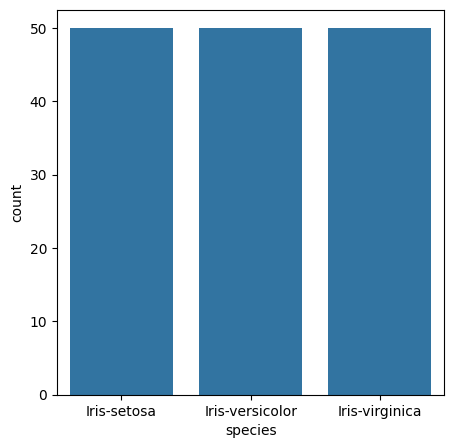

In [25]:
#count plot says there are 50 records for each species:

plot=plt.figure(figsize=(5,5))
#To creates a new figure object (plot) with width=height= 5inches using Matplotlib.

sns.countplot(x='species',data=df)
#Uses Seaborn (sns) to create a count plot for each unique value in the 'species' column (x='species')


In [28]:
#Error: could not convert string to float: 'Iris-setosa'. -Scatter plot function raise error if  dataset contains string data . So encode the string values in 'species' to numeric equivalents:
#Iris-setosa' becomes 0, 'Iris-versicolor' becomes 1, 'Iris-virginica' becomes 2

df.replace({'species':{'Iris-setosa':0,'Iris-versicolor':
1,'Iris-virginica':2}},inplace=True)

#inplace=True: This parameter ensures that the changes are made directly to df without creating a new DataFrame.

<Axes: >

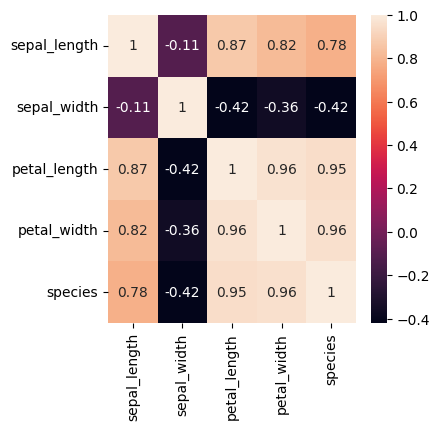

In [29]:
#Draw the graph:
plt.figure(figsize=(4,4))
#Sets up a new figure with height=width=4 inches, using Matplotlib

sns.heatmap(df.corr(),annot= True)
#df.corr(): Calculates the correlation coefficients between numeric columns in the DataFrame df, producing a square matrix where each element represents the correlation between two columns.
#annot=True: Displays the numeric values in each cell of the heatmap, which represent the correlation coefficients.


In [30]:
#To train the machine learning model, 1st split the dataset into training and testing subsets.

X=df.drop(columns='species')
#To train the machine learning model, 1st split the dataset into training and testing subsets.

Y=df['species']
#Y contain column 'species'
print(X)
print(Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split
#train_test_split function from is used to split datasets into random train and test subsets

In [34]:
#Splits the dataset X and Y into training and testing sets, with 10% of the data used for testing.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

# train_test_split: This function is used to split data into random train and test subsets.
# X: represents the feature data (independent variables) & Y: represents the target data (dependent variable)
# test_size=0.1:  10% data should be used as the test set & 90% will be for training.
# stratify=Y: To ensures the split will maintain the same proportion of target labels in both the training and testing sets. Each class shpuld be adequately represented in both subsets.
# random_state=1: This parameter sets a seed for the random number generator to ensure that the results are reproducible.

x_train

,sepal_length,sepal_width,petal_length,petal_width
77,6.7,3.0,5.0,1.7
114,5.8,2.8,5.1,2.4
110,6.5,3.2,5.1,2.0
139,6.9,3.1,5.4,2.1
39,5.1,3.4,1.5,0.2
...,...,...,...,...
45,4.8,3.0,1.4,0.3
118,7.7,2.6,6.9,2.3
41,4.5,2.3,1.3,0.3
127,6.1,3.0,4.9,1.8


In [36]:
#Classifier algorithms:
#Used to classify data into different categories / classes based on input features. Common types are:

#1.Support Vector Machines (SVM): SVM constructs hyperplanes in a multidimensional space to separate data into classes, aiming to maximize the margin between classes.
#2.Decision Trees: It recursively partition data into subsets based on feature values, creating a tree-like structure where leaves represent class labels.
#3.K-Nearest Neighbors (KNN): KNN classifies data points based on the majority class among their nearest neighbors in the feature space.

In [46]:
from sklearn.metrics import accuracy_score #Imports the accuracy_score function to calculate the accuracy of classification models.

In [54]:
#To train the classification model using the SVM algorithm:'''
from sklearn import svm
svm=svm.SVC(kernel='linear') #creates an instance of the SVM classifier with a linear kernel.
svm.fit(x_train,y_train) #trains the SVM model using the training data (x_train and y_train).

SVC(kernel='linear')

In [55]:
#accuracy on training data -Decision tree
x_train_prediction=svm.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on training data:',training_data_accuracy)
#accuracy on test data
x_test_prediction=svm.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.9925925925925926
accuracy on test data: 0.9333333333333333


In [50]:
#To train the classification model using the Decision Tree Classifier algorithm:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier().fit(x_train,y_train)

In [51]:
#accuracy on training data -Decision tree
x_train_prediction=dtc.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on training data:',training_data_accuracy)
#accuracy on test data
x_test_prediction=dtc.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 1.0
accuracy on test data: 0.9333333333333333


**OR**

In [52]:
#k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier #imports the KNN classifier from the sklearn.neighbors module.
knn=KNeighborsClassifier() #creates an instance of the KNN classifier. By default, it uses 5 neighbors.
knn.fit(x_train,y_train) #trains the KNN model using the training data (x_train and y_train).

KNeighborsClassifier()

In [53]:
#To train the classification model using the KNN algorithm:
x_train_prediction=knn.predict(x_train)
training_Data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy on training data:",training_data_accuracy)
#accuracy on test data
x_test_prediction=knn.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 1.0
accuracy on test data: 0.9333333333333333
